<a href="https://colab.research.google.com/github/montblanc-1981/data-analysis-basic-kadai/blob/main/optuna/kadai_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<Axes: xlabel='ds', ylabel='y'>

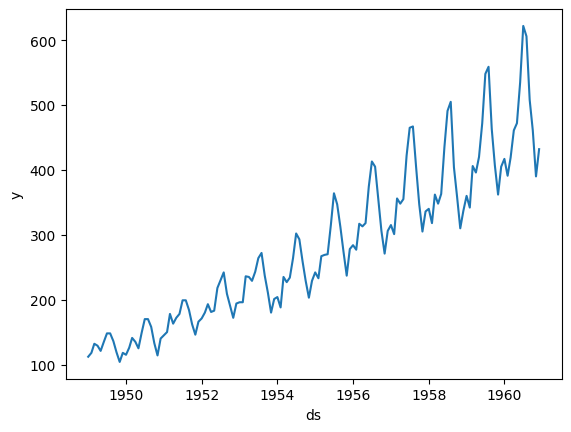

In [9]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
from prophet import Prophet
model = Prophet()


In [12]:
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp33d7wq9k/iox9jyqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp33d7wq9k/otbv2t7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7486', 'data', 'file=/tmp/tmp33d7wq9k/iox9jyqb.json', 'init=/tmp/tmp33d7wq9k/otbv2t7u.json', 'output', 'file=/tmp/tmp33d7wq9k/prophet_model_7rlz1xj/prophet_model-20231124125042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=36, freq='MS')
future


,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [14]:
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,55.947393,113.000741,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.801021,107.259580,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,82.683006,140.333910,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,80.732746,137.151834,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.285002,141.805092,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,624.596122,679.892304,580.321816,585.957758,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,574.659270,631.353776,583.311969,589.220919,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,537.406819,595.242237,586.249307,592.377377,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,503.682481,563.083038,589.187540,595.674478,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.018883,55.947393,113.000741
1,1949-02-01,79.495226,50.801021,107.259580
2,1949-03-01,111.025581,82.683006,140.333910
3,1949-04-01,108.719017,80.732746,137.151834
4,1949-05-01,112.095281,83.285002,141.805092
...,...,...,...,...
175,1963-08-01,650.733803,624.596122,679.892304
176,1963-09-01,603.483588,574.659270,631.353776
177,1963-10-01,567.259613,537.406819,595.242237
178,1963-11-01,535.439784,503.682481,563.083038


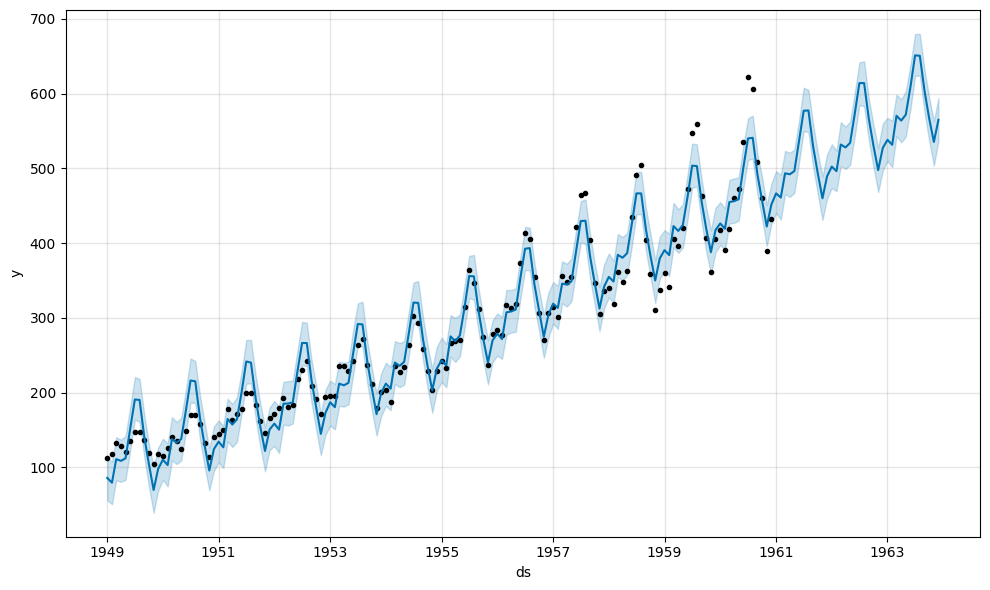

In [16]:
fig_forecast = model.plot(forecast)


In [17]:
cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])


In [18]:
from prophet.diagnostics import cross_validation


In [19]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp33d7wq9k/ag7ez132.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp33d7wq9k/kwfi5z9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76514', 'data', 'file=/tmp/tmp33d7wq9k/ag7ez132.json', 'init=/tmp/tmp33d7wq9k/kwfi5z9d.json', 'output', 'file=/tmp/tmp33d7wq9k/prophet_model4ehzb99p/prophet_model-20231124125126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:51:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp33d7wq9k/_yuryut5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp33d7wq9k/cc7co8kn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [20]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,227.121428,248.879582,242,1954-12-01
1,1955-02-01,241.792078,230.213611,252.695871,233,1954-12-01
2,1955-03-01,267.141230,255.774183,278.720815,267,1954-12-01
3,1955-04-01,257.744480,245.923899,270.031887,269,1954-12-01
4,1955-05-01,261.961916,251.580089,273.548538,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,548.443272,526.467883,568.446366,606,1957-12-01
140,1960-09-01,511.578231,490.449128,531.344626,508,1957-12-01
141,1960-10-01,480.747994,459.379435,499.790373,461,1957-12-01
142,1960-11-01,455.417988,435.995229,475.863366,390,1957-12-01


In [21]:
from prophet.diagnostics import performance_metrics


In [22]:
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,121 days,687.400156,26.218317,19.285619,0.060133,0.039788,0.057291,0.607143
1,122 days,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.642857
2,151 days,644.424799,25.385523,18.070242,0.055246,0.032945,0.052755,0.678571
3,152 days,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.714286
4,182 days,583.584697,24.157498,17.463575,0.050684,0.030947,0.050311,0.666667


In [23]:
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.642857
1,5,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.714286
2,6,676.263707,26.005071,19.591839,0.056243,0.030947,0.056366,0.607143
3,7,1338.378492,36.583856,29.852167,0.078469,0.091159,0.081789,0.392857
4,8,1849.989022,43.011499,38.904615,0.097044,0.107401,0.102882,0.178571


<Axes: xlabel='horizon', ylabel='mse'>

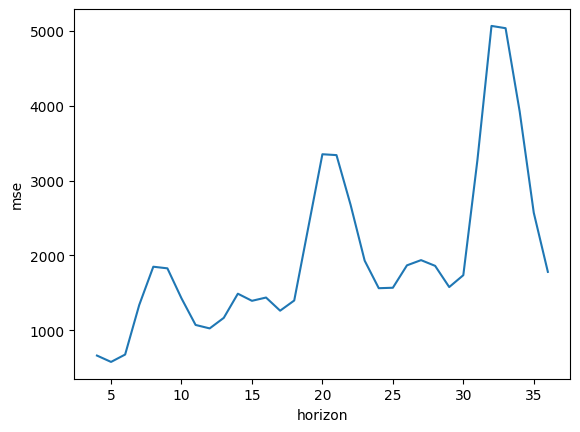

In [24]:
sns.lineplot(x='horizon', y='mse', data=df_p)


<Axes: xlabel='horizon', ylabel='coverage'>

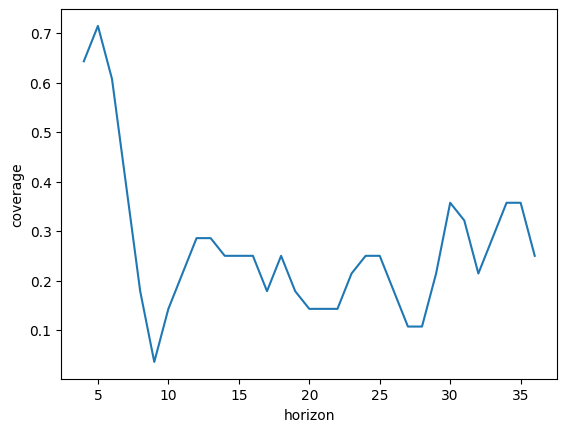

In [25]:
sns.lineplot(x='horizon', y='coverage', data=df_p)


In [26]:
pip install optuna

In [28]:
import optuna

def objective_variable(train,valid):

    cap = int(np.percentile(train.y,95))
    floor = int(np.percentile(train.y,5))

    def objective(trial):
        params = {
                 'changepoint_prior_scale' : trial.suggest_discrete_uniform('changepoint_prior_scale',0.001,0.5,0.001),
                 'seasonality_prior_scale' : trial.suggest_discrete_uniform('seasonality_prior_scale',1,25,0.5),
                 'holidays_prior_scale' : trial.suggest_discrete_uniform('holidays_prior_scale',1,25,0.5)
        }
        m=Prophet(
            changepoint_prior_scale=params['changepoint_prior_scale'],
            seasonality_prior_scale=params['seasonality_prior_scale'],
            holidays_prior_scale=params['holidays_prior_scale']
        )

        train['cap']=cap
        train['floor']=floor

        m.fit(train)
        future = m.make_future_dataframe(periods=len(valid))

        future['cap']=cap
        future['floor']=floor

        forecast = m.predict(future)
        valid_forecast = forecast.tail(len(valid))

        val_mape = np.mean(np.abs((valid_forecast.yhat-valid.y)/valid.y))*100
        return val_mape

    return objective

def optuna_parameter(train, valid):
    study = optuna.create_study(sample=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective_variable(train,valid), timeout=1000)
    optuna_best_params = study.best_params

    return study

    print(study.best_params)
